## HEALTHCARE ANALYSIS

## importing necessary libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek 
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## read data 

In [2]:
data=pd.read_csv('health care diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
lst=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [ ]:
si_median=SimpleImputer(missing_values=0, strategy='median')

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
for col in lst:
    data[col]=data[col].replace(0, np.nan)

In [9]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
for col in lst:
    if col=='Insulin':
        data[col]=data[col].fillna(data[col].mean())
    else:
        data[col]=data[col].fillna(data[col].median())

In [11]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,155.548223,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,85.021108,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.548223,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>],
       [<AxesSubplot:title={'center':'BMI'}>, <AxesSubplot:>]],
      dtype=object)

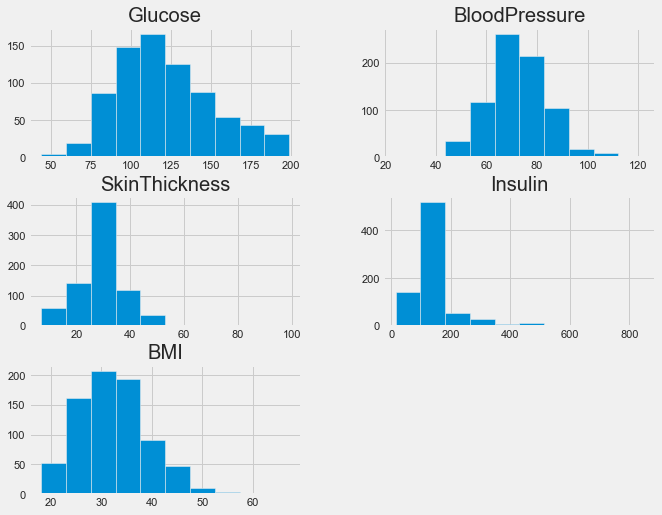

In [29]:
plt.style.use('fivethirtyeight')
data[lst].hist()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

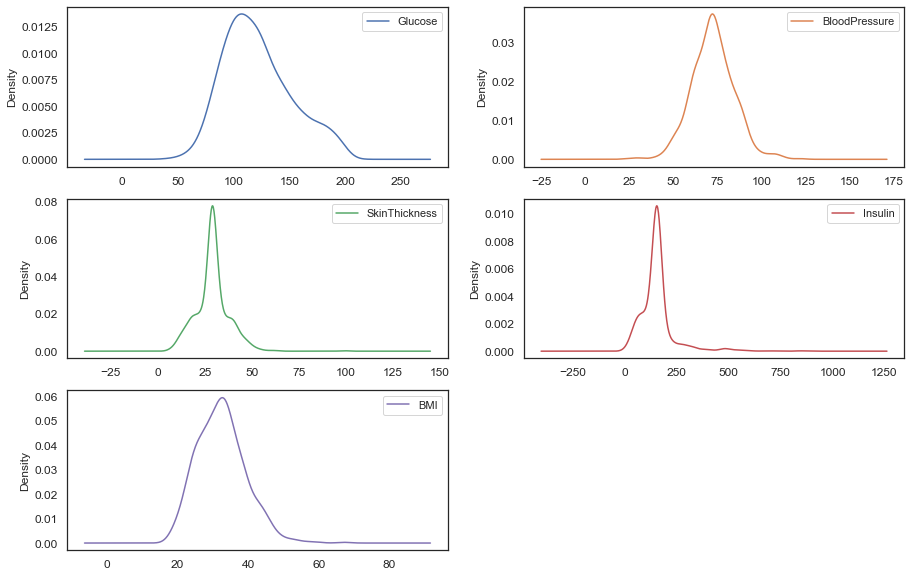

In [17]:
data[lst].plot(kind= 'density', subplots=True, layout=(3,2), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

<AxesSubplot:>

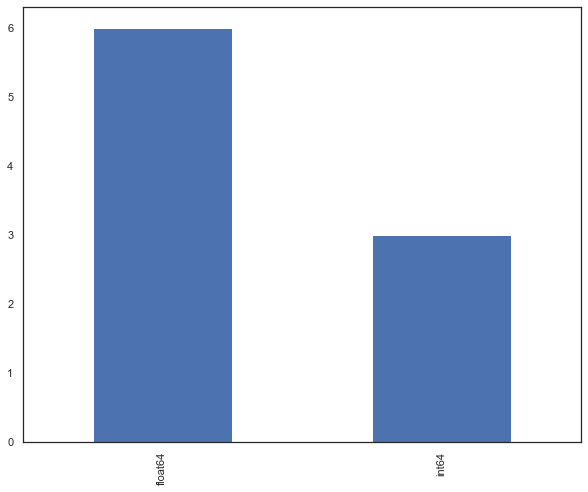

In [14]:
data.dtypes.value_counts().plot.bar()

In [15]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

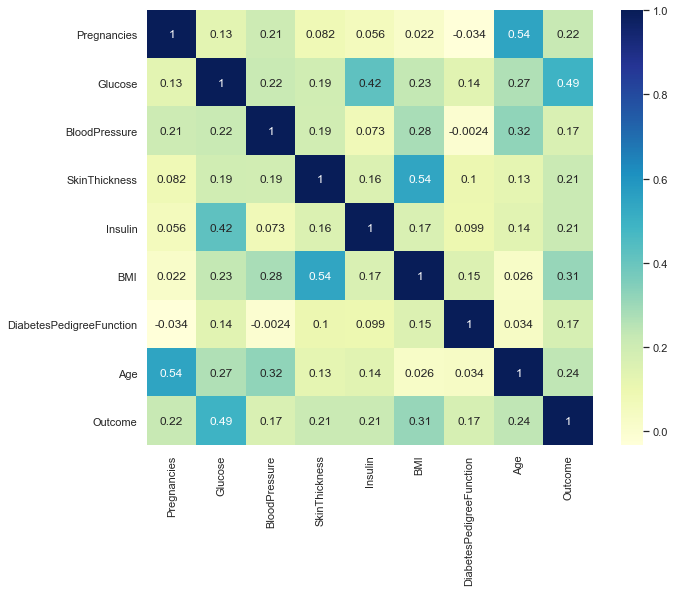

In [16]:
sns.heatmap(data=data.corr(), annot=True, cmap="YlGnBu")

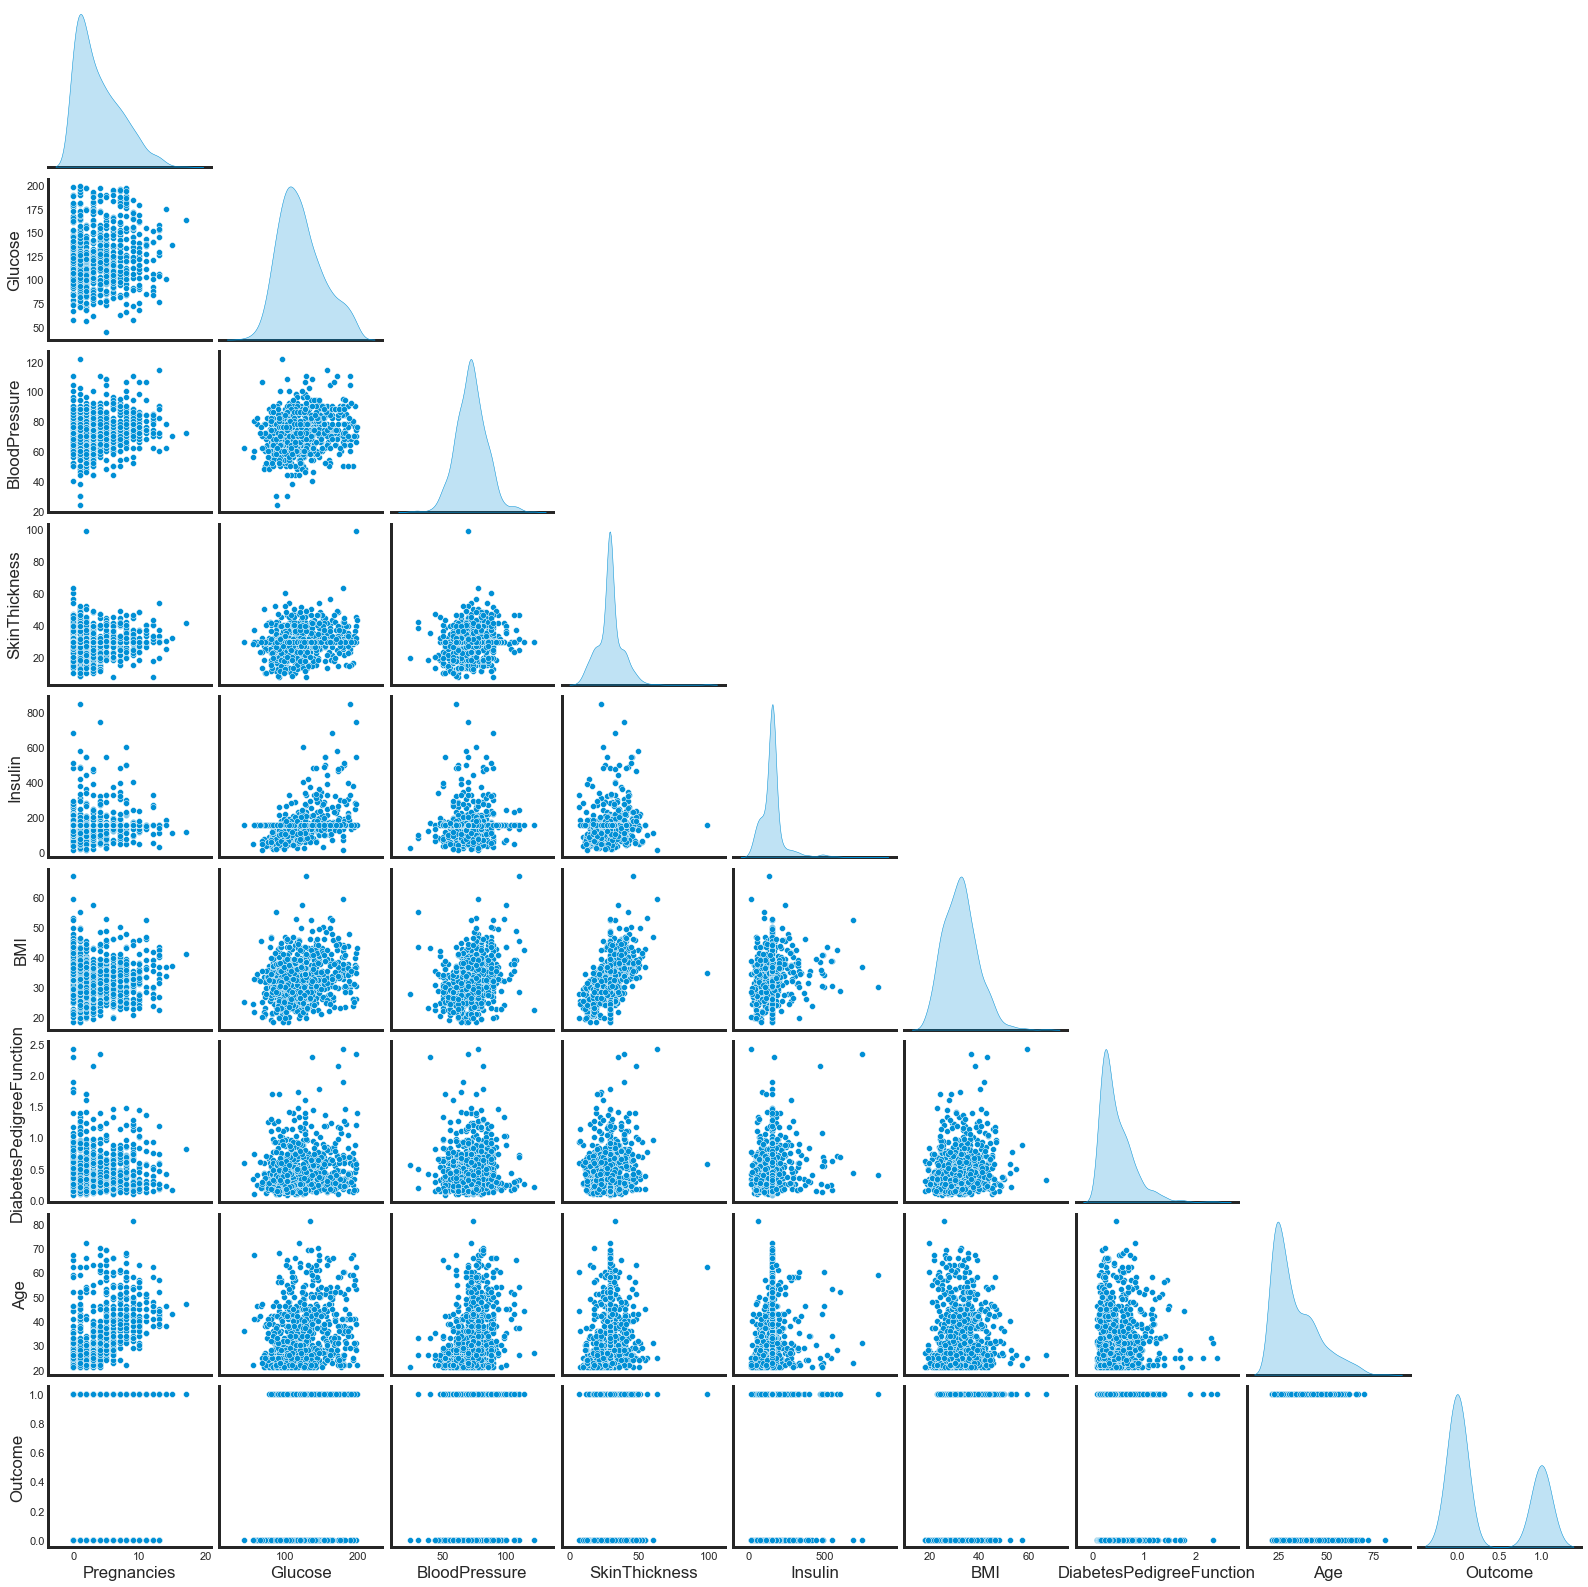

In [28]:
plt.style.use('fivethirtyeight')
sns.set_style("white")
sns.pairplot(data=data, diag_kind='kde', corner=True)

## from the above we get some insights

## 1.BMI and SkinThickness has positive correlation

## 2.Age and Pregnancies has a relation

## 3. Insulin and Glucose has somewhat positive correlation

In [60]:
#data.to_csv('updated_data.csv')

In [19]:
X, Y=data.iloc[:,0:8], data.iloc[:, 8]

In [20]:
smt=SMOTETomek(random_state=43)
X_smt, Y_smt=smt.fit_resample(X, Y)

In [21]:
Y.value_counts(), Y_smt.value_counts()

(0    500
 1    268
 Name: Outcome, dtype: int64,
 0    470
 1    470
 Name: Outcome, dtype: int64)

## as we can see we balanced our dataset using smotetek

In [35]:
x_train, x_test, y_train, y_test=train_test_split(X_smt, Y_smt, test_size=0.3, random_state=43)

In [37]:
st=StandardScaler()

In [38]:
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

## as the dependent variable is categorical(1 or 0).we go with supervised machine learning algorithms.

## we take classification algorithms from supervised learning

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [40]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()

In [41]:
model_lst=[('Logistic Regression',lr),('Decision Tree',dtc),('KNearestNeighbour',knn),('Support Vector Machines',svc)]

Logistic Regression


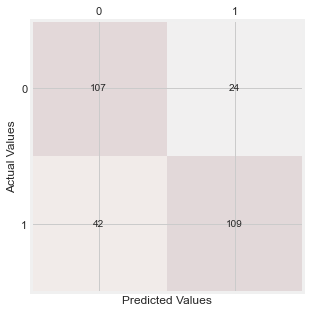

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       131
           1       0.82      0.72      0.77       151

    accuracy                           0.77       282
   macro avg       0.77      0.77      0.77       282
weighted avg       0.77      0.77      0.77       282

Decision Tree


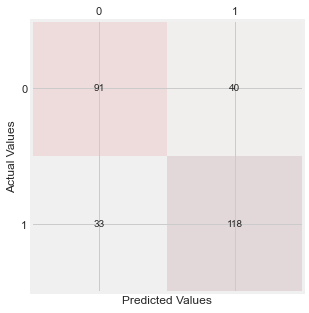

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       131
           1       0.75      0.78      0.76       151

    accuracy                           0.74       282
   macro avg       0.74      0.74      0.74       282
weighted avg       0.74      0.74      0.74       282

KNearestNeighbour


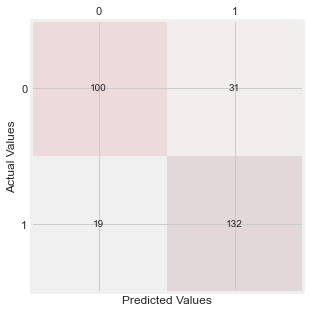

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       131
           1       0.81      0.87      0.84       151

    accuracy                           0.82       282
   macro avg       0.83      0.82      0.82       282
weighted avg       0.82      0.82      0.82       282

Support Vector Machines


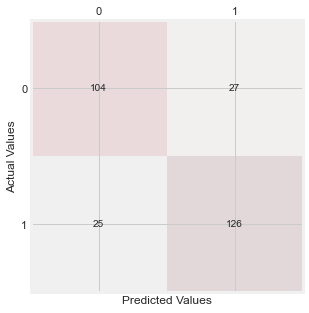

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       131
           1       0.82      0.83      0.83       151

    accuracy                           0.82       282
   macro avg       0.81      0.81      0.81       282
weighted avg       0.82      0.82      0.82       282



In [43]:
import matplotlib.pyplot as plt

from IPython.display import Image, display
%matplotlib inline
for name, model in model_lst:
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    print(name)
    #print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.1)
    for i in range(cm.shape[0]):
         for j in range(cm.shape[1]):
                ax.text(x=j, y=i,
                   s=cm[i, j], 
                    va='center', ha='center')
    plt.xlabel('Predicted Values', )
    plt.ylabel('Actual Values')
    plt.show()
    print(classification_report(y_test, y_pred ))

In [48]:
X_smt=st.fit_transform(X_smt)
for name, model in model_lst:
    print(name, cross_val_score(model, X_smt, Y_smt, scoring='accuracy', cv=10).mean())

Logistic Regression 0.7659574468085106
Decision Tree 0.747872340425532
KNearestNeighbour 0.7946808510638298
Support Vector Machines 0.801063829787234


## Hyper Parameter Tuning

## we will do tuning for both SVC and KNN

## SVC

In [50]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_svc=GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=10, n_jobs=-1, refit=True, verbose=2)

In [51]:
grid_svc.fit(x_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [53]:
print(grid_svc.best_estimator_)

SVC(C=10, gamma=0.1)


In [55]:
print("The best parameters are %s with a score of %0.2f"
      % (grid_svc.best_params_, grid_svc.best_score_))

The best parameters are {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 0.81


In [60]:
grid_svc.best_estimator_.kernel = 'rbf'
hyp_svc=grid_svc.best_estimator_

In [61]:
print(hyp_svc)

SVC(C=10, gamma=0.1, probability=True)


              precision    recall  f1-score   support

           0       0.78      0.79      0.78       131
           1       0.81      0.81      0.81       151

    accuracy                           0.80       282
   macro avg       0.80      0.80      0.80       282
weighted avg       0.80      0.80      0.80       282



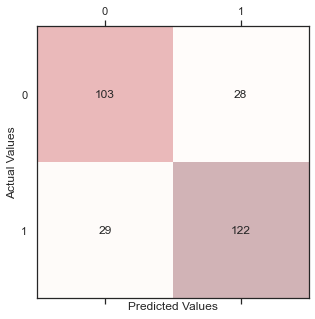

In [63]:
y_pred = SVC(C=10, gamma=0.1, kernel='rbf').fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

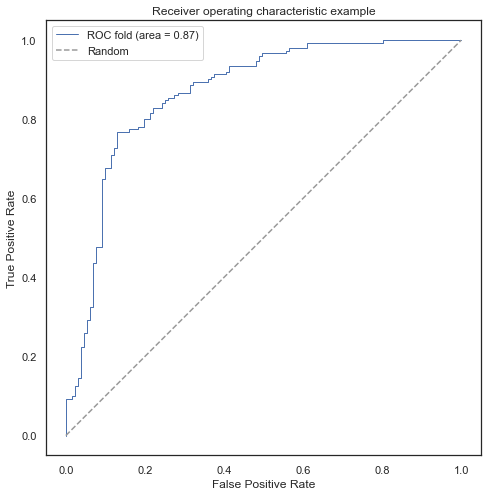

In [65]:
from sklearn.metrics import roc_curve, auc
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ =hyp_svc.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend()
plt.axes().set_aspect(1)

## KNN

In [66]:
param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
              'leaf_size' : list(range(1,40)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [67]:
grid_knn=GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

In [69]:
grid_knn.fit(x_train,y_train)

Fitting 10 folds for each of 1404 candidates, totalling 14040 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [70]:
print(grid_knn.best_estimator_)

KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=9,
                     weights='distance')


In [72]:
print("The best parameters are %s with a score of %0.2f"
      % (grid_knn.best_params_, grid_knn.best_score_))

The best parameters are {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'} with a score of 0.80


In [73]:
hyp_knn=grid_knn.best_estimator_

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       131
           1       0.80      0.92      0.86       151

    accuracy                           0.83       282
   macro avg       0.84      0.83      0.83       282
weighted avg       0.84      0.83      0.83       282



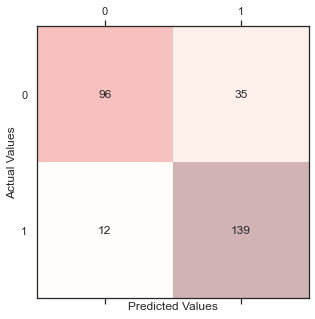

In [74]:
y_pred=hyp_knn.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred ))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()

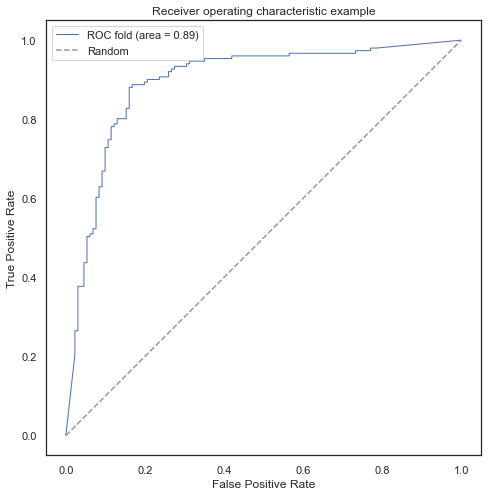

In [75]:
from sklearn.metrics import roc_curve, auc
# Plot the receiver operating characteristic curve (ROC).
plt.figure(figsize=(10,8))
probas_ =hyp_knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend()
plt.axes().set_aspect(1)

## After Hyper Parameter Tuning its showing that KNN is slightly good than SVC 